# image classification 

aim: predicting mushroom species from image

## get data 

In [191]:
import pathlib
import PIL
import matplotlib

In [192]:
# data already merged with same extension (jpg vs JPG)
directory_species = "/Users/laurameyer/code/DSP-Tan/mushroom_learning/raw_data/mushrooms_species"

In [193]:
def get_images_directory(directory):
    data_dir = pathlib.Path(directory)
    return data_dir

In [194]:
data_dir = get_images_directory(directory_species)
data_dir

PosixPath('/Users/laurameyer/code/DSP-Tan/mushroom_learning/raw_data/mushrooms_species')

In [195]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3667


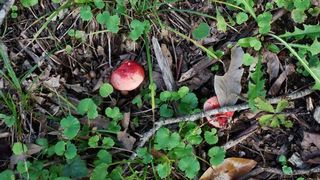

In [196]:
mushrooms = list(data_dir.glob('*/*'))
PIL.Image.open(str(mushrooms[60]))

In [99]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [96]:
img_height = 224
img_width = 224
batch_size = 32

In [197]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

def load_training_data():

    return tf.keras.utils.image_dataset_from_directory(
      data_dir,
      labels='inferred',
      validation_split=0.2,
      subset="training",
      seed=123,
      image_size=(img_height, img_width),
      batch_size=batch_size
    )

train_ds = load_training_data()
type(train_ds)

Found 3667 files belonging to 6 classes.
Using 2934 files for training.


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [198]:
def load_validation_data():
    return tf.keras.utils.image_dataset_from_directory(
      data_dir,
      labels='inferred', 
      validation_split=0.2,
      subset="validation",
      seed=123,
      image_size=(img_height, img_width),
      batch_size=batch_size
    )

val_ds = load_validation_data()
type(val_ds)

Found 3667 files belonging to 6 classes.
Using 733 files for validation.


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [123]:
class_names = train_ds.class_names
print(class_names)

['amanita_muscaria', 'amanita_virosa', 'boletus_edulis', 'cantharellus_cibarius', 'russula_mairei', 'trametes_versicolor']


In [199]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [200]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [201]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [125]:
num_classes = len(class_names)
print(num_classes)

#model = Sequential([
  #data_augmentation,
  #layers.Rescaling(1./255),
  #layers.Conv2D(16, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Conv2D(32, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  #layers.Flatten(),
  #layers.Dense(128, activation='relu'),
  #layers.Dense(num_classes)
#])

6


In [126]:
#opt = keras.optimizers.Adam(learning_rate=1e-4)

#model.compile(optimizer=opt,
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #metrics=['accuracy'] )

In [119]:
#model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [127]:
#from tensorflow.keras.callbacks import EarlyStopping

#es = EarlyStopping(patience=10, restore_best_weights=True)

#epochs = 20
#history = model.fit(
  #train_ds,
  #validation_data=val_ds,
  #epochs=epochs,
  #callbacks=[es], 
  #verbose=1
#)

Epoch 1/10
92/92 [==============================] - 186s 2s/step - loss: 1.4775 - accuracy: 0.4257 - val_loss: 1.3322 - val_accuracy: 0.5239
Epoch 2/10
92/92 [==============================] - 178s 2s/step - loss: 1.2570 - accuracy: 0.5402 - val_loss: 1.2132 - val_accuracy: 0.5539
Epoch 3/10
92/92 [==============================] - 196s 2s/step - loss: 1.1486 - accuracy: 0.5729 - val_loss: 1.1355 - val_accuracy: 0.5784
Epoch 4/10
92/92 [==============================] - 151s 2s/step - loss: 1.0737 - accuracy: 0.6063 - val_loss: 1.0501 - val_accuracy: 0.6112
Epoch 5/10
92/92 [==============================] - 181s 2s/step - loss: 1.0387 - accuracy: 0.6282 - val_loss: 1.1419 - val_accuracy: 0.6030
Epoch 6/10
92/92 [==============================] - 217s 2s/step - loss: 0.9939 - accuracy: 0.6476 - val_loss: 1.0210 - val_accuracy: 0.6126
Epoch 7/10
92/92 [==============================] - 154s 2s/step - loss: 0.9399 - accuracy: 0.6721 - val_loss: 1.0277 - val_accuracy: 0.6289
Epoch 8/10
92

[0.4256986975669861, 0.5402181148529053, 0.5729379653930664, 0.6063394546508789, 0.6281526684761047, 0.647580087184906, 0.6721199750900269, 0.6765508055686951]
[0.5238744616508484, 0.5538881421089172, 0.5784447193145752, 0.6111869215965271, 0.6030013561248779, 0.6125511527061462, 0.6289222240447998, 0.608458399772644]
range(0, 8)


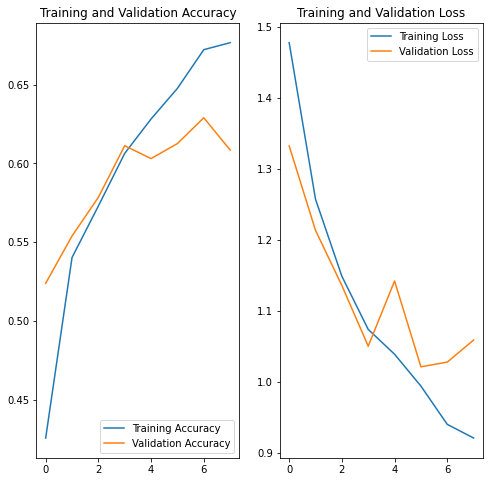

In [129]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
print(acc)
val_acc = history.history['val_accuracy']
print(val_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(0,8)
print(epochs_range)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# score to beat: accuracy: 0.6766

## targets and input from val_ds

In [238]:
def get_labels_from_tfdataset(tfdataset, batched=False):

    labels = list(map(lambda x: x[1], tfdataset)) # Get labels 

    if not batched:
        return tf.concat(labels, axis=0) # concat the list of batched labels

    return labels

In [239]:
def get_inputs_from_tfdataset(tfdataset, batched=False):

    labels = list(map(lambda x: x[0], tfdataset)) # Get labels 

    if not batched:
        return tf.concat(labels, axis=0) # concat the list of batched labels

    return labels

In [240]:
val_ds_labels = get_labels_from_tfdataset(val_ds)

In [241]:
val_ds_inputs = get_inputs_from_tfdataset(val_ds)

## Tranfer Learning with VGG

In [242]:
from tensorflow.keras.applications import VGG16

In [243]:
input_shape = (224, 224, 3)

def load_model():
    
    model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape, classes=num_classes)
    
    return model

In [244]:
def set_nontrainable_layers(model):
    
    model.trainable = False
    
    return model

#for layer in vgg_model.layers:
#    layer.trainable = False

In [261]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    base_model = set_nontrainable_layers(model)
    rescaling = layers.Rescaling(1./255),
    dropout_layer = layers.Dropout(0.2)
    flatten_layer = layers.Flatten()
    dense_layer_1 = layers.Dense(50, activation='relu')
    dense_layer_2 = layers.Dense(20, activation='relu')
    prediction_layer = layers.Dense(num_classes, activation='softmax')
    
    model = models.Sequential([
        data_augmentation,
        rescaling,
        base_model,
        dropout_layer, 
        flatten_layer,
        dense_layer_1,
        dense_layer_2,
        prediction_layer
    ])
    
    return model

In [262]:
vgg_model = load_model()
vgg_model

In [263]:
vgg_model = add_last_layers(vgg_model)

In [264]:
val_prediction = vgg_model.predict(val_ds_inputs)

In [265]:
val_prediction.shape

(733, 6)

In [266]:
labels = np.argmax(val_prediction, axis=1)

In [267]:
from sklearn import metrics

results = metrics.accuracy_score(val_ds_labels, labels)

In [268]:
results #whaaaat

0.15961800818553887

## fit vgg model 

In [269]:
from tensorflow.keras import optimizers

def build_model(): 
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    
    model = model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [273]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 30


model = build_model()
#es = EarlyStopping(patience=5, restore_best_weights=True)
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs, 
                    verbose=1,
                    callbacks=[es])

Epoch 1/30
92/92 [==============================] - 961s 10s/step - loss: 2.2905 - accuracy: 0.3865 - val_loss: 1.4882 - val_accuracy: 0.4720
Epoch 2/30
92/92 [==============================] - 894s 10s/step - loss: 1.2739 - accuracy: 0.5671 - val_loss: 1.1614 - val_accuracy: 0.6126
Epoch 3/30
92/92 [==============================] - 870s 9s/step - loss: 0.9688 - accuracy: 0.6626 - val_loss: 1.0526 - val_accuracy: 0.6698
Epoch 4/30
92/92 [==============================] - 868s 9s/step - loss: 0.8406 - accuracy: 0.7157 - val_loss: 1.0053 - val_accuracy: 0.7026
Epoch 5/30
92/92 [==============================] - 866s 9s/step - loss: 0.6965 - accuracy: 0.7614 - val_loss: 0.9592 - val_accuracy: 0.7244
Epoch 6/30
92/92 [==============================] - 863s 9s/step - loss: 0.6146 - accuracy: 0.7955 - val_loss: 0.9885 - val_accuracy: 0.7462
Epoch 7/30
92/92 [==============================] - 866s 9s/step - loss: 0.5465 - accuracy: 0.8197 - val_loss: 0.9451 - val_accuracy: 0.7776
Epoch 8/30


In [274]:
model.save("../our_second_model")

INFO:tensorflow:Assets written to: ../our_second_model/assets
